# Great Learning Assignment

In [70]:
import os
import pandas as pd
import numpy as np

In [71]:
os.listdir('../data/')

['latest - orig.xlsx', 'Problems & DD.xlsx', 'trails - orig.xlsx']

In [72]:
df = pd.read_excel('../data/latest - orig.xlsx')
df.head()

,ProspectID,CreatedOn,mx_Country,mx_Preferred_Campus,mx_Exp_In_Years,DoNotCall,DoNotEmail,mx_Mode_of_Instruction,Source,SourceMedium,...,mx_Current_Interested_Program,mx_Application_Date,mx_Industry,mx_UG_Degree,mx_UG_Passing_Year,mx_PG_Degree,mx_PG_Passing_Year,mx_Batch_Code,mx_City,mx_Device_details
0,65e26baf-5ed5-4c08-92a6-426c0f4052b5,2019-02-16 20:51:09,NaN,Mumbai,2-3 Years,0,0,Classroom,google,Display,...,PGPML-Online,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 6A | Android 8.1.0 |...
1,a6998bac-67e9-479e-aca9-d2808b4522f1,2019-02-07 15:39:26,NaN,Mumbai,1-2 Years,0,0,NaN,facebook,Mumbai - DSEFT - LAE (1%),...,DSEFT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 4A | Android 6.0.1 |...
2,c26dbf1b-6e27-44ce-b33f-a090f7acc040,2018-12-30 15:19:59,NaN,Delhi,2-5 Years,0,0,NaN,Facebook,LAE-LTV-1%,...,PGPBA,NaT,Others,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Lenovo A7020a48 | Android 6.0 | C...
3,1ebf4111-94da-4c73-96b7-55dcb74a4336,2019-05-31 08:19:16,Singapore,Online,>15 Years,0,0,NaN,facebook,LAE1–32to45,...,PGPBABI-Online-International,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,smartphone | Apple iPhone | iOS 12.3 | Mobile ...
4,aa5b2c0e-bf49-4702-9235-05c7d7b62776,2016-12-14 04:59:18,NaN,Gurgaon,2-5 Years,0,1,NaN,Zopim Chat,olp,...,PGPBA,NaT,IT & Technology,NaN,NaN,NaN,NaN,NaN,Gurgaon,NaN


In [73]:
df['DoNotEmail'].value_counts()

0    895
1    105
Name: DoNotEmail, dtype: int64

In [158]:
def plot_top_n(s, n=5):
    counts = s.str.lower().str.capitalize().value_counts()
    top_counts = counts[:n]
    top_counts.plot(kind='bar')
    
    return counts[:n]
    

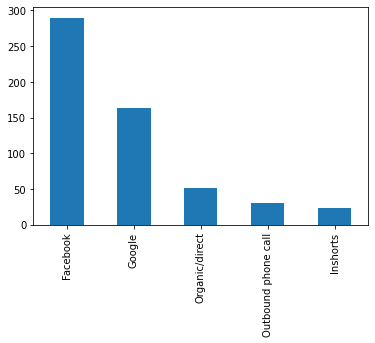

In [100]:
plot_top_n(df['Source'], 5)

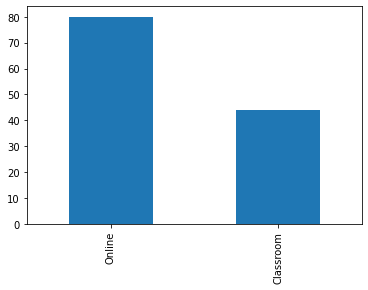

In [103]:
counts = plot_top_n(df['mx_Mode_of_Instruction'])

Lead called          454
Rejected             353
Lead                 121
Pending applicant     36
Enrolled              15
Applicant             12
Offered                3
Offer expired          3
Invalid                1
Graduated              1
Junk lead              1
Name: ProspectStage, dtype: int64

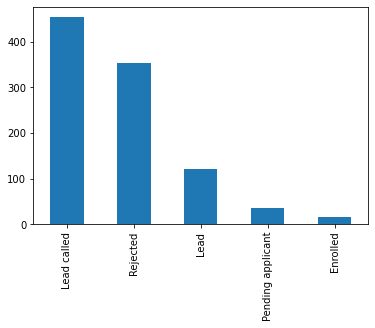

In [108]:
plot_top_n(df['ProspectStage'])

Online    2
Name: mx_Mode_of_Instruction, dtype: int64

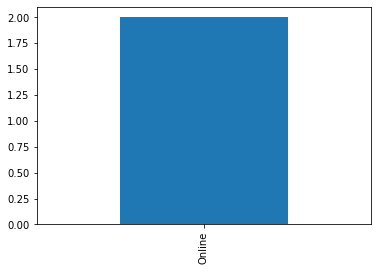

In [107]:
plot_top_n(df.loc[df['ProspectStage'] == 'Enrolled', 
                  'mx_Mode_of_Instruction'])

In [75]:
PERCS = np.arange(0.05, 1, 0.05)
def get_continous_smry(ser):
    smry = ser.describe(percentiles=PERCS)
    smry = smry.drop(['count', 'std'])
    smry['% null'] = ser.isna().mean()*100
    

    return smry

In [76]:
cont_cols = ['Score', 'EngagementScore']
df[cont_cols].apply(get_continous_smry).T

,mean,min,5%,10%,15%,20%,25%,30%,35%,40%,...,60%,65%,70%,75%,80%,85%,90%,95%,max,% null
Score,21.165496,-48.0,-10.0,0.0,0.0,2.0,2.0,4.0,5.6,6.0,...,12.0,16.0,20.0,24.0,33.0,40.6,56.0,85.0,1142.0,0.3
EngagementScore,5.887663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,6.0,6.0,8.0,11.0,14.0,24.0,141.0,0.3


In [77]:
df.head(df['mx_Preferred_Campus'], 5)

,ProspectID,CreatedOn,mx_Country,mx_Preferred_Campus,mx_Exp_In_Years,DoNotCall,DoNotEmail,mx_Mode_of_Instruction,Source,SourceMedium,...,mx_Current_Interested_Program,mx_Application_Date,mx_Industry,mx_UG_Degree,mx_UG_Passing_Year,mx_PG_Degree,mx_PG_Passing_Year,mx_Batch_Code,mx_City,mx_Device_details
0,65e26baf-5ed5-4c08-92a6-426c0f4052b5,2019-02-16 20:51:09,NaN,Mumbai,2-3 Years,0,0,Classroom,google,Display,...,PGPML-Online,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 6A | Android 8.1.0 |...
1,a6998bac-67e9-479e-aca9-d2808b4522f1,2019-02-07 15:39:26,NaN,Mumbai,1-2 Years,0,0,NaN,facebook,Mumbai - DSEFT - LAE (1%),...,DSEFT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 4A | Android 6.0.1 |...
2,c26dbf1b-6e27-44ce-b33f-a090f7acc040,2018-12-30 15:19:59,NaN,Delhi,2-5 Years,0,0,NaN,Facebook,LAE-LTV-1%,...,PGPBA,NaT,Others,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Lenovo A7020a48 | Android 6.0 | C...
3,1ebf4111-94da-4c73-96b7-55dcb74a4336,2019-05-31 08:19:16,Singapore,Online,>15 Years,0,0,NaN,facebook,LAE1–32to45,...,PGPBABI-Online-International,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,smartphone | Apple iPhone | iOS 12.3 | Mobile ...
4,aa5b2c0e-bf49-4702-9235-05c7d7b62776,2016-12-14 04:59:18,NaN,Gurgaon,2-5 Years,0,1,NaN,Zopim Chat,olp,...,PGPBA,NaT,IT & Technology,NaN,NaN,NaN,NaN,NaN,Gurgaon,NaN


In [78]:
df.isna().mean()*100

ProspectID                        0.0
CreatedOn                         0.0
mx_Country                       70.0
mx_Preferred_Campus               8.6
mx_Exp_In_Years                  11.4
DoNotCall                         0.0
DoNotEmail                        0.0
mx_Mode_of_Instruction           87.6
Source                           24.6
SourceMedium                     13.2
SourceCampaign                   19.9
ProspectStage                     0.0
Score                             0.3
EngagementScore                   0.3
mx_Current_Interested_Program     0.7
mx_Application_Date              89.5
mx_Industry                      46.4
mx_UG_Degree                     89.4
mx_UG_Passing_Year               89.4
mx_PG_Degree                     99.9
mx_PG_Passing_Year               98.1
mx_Batch_Code                    97.6
mx_City                          67.1
mx_Device_details                53.4
dtype: float64

In [80]:
import re

def remove_all_wspace(s):
    return s.replace(' ', '')

In [81]:
df['mx_Exp_In_Years'] = df['mx_Exp_In_Years'].str.replace(' - ', '-')

In [82]:
df.loc[df['ProspectStage'] == 'Rejected', 'mx_Exp_In_Years'].value_counts()

<1 Year        63
5-8 Years      45
8-12 Years     41
2-5 Years      34
1-2 Years      31
0 Years        27
>15 Years      25
12-15 Years    24
3-5 Years      19
2-3 Years      18
Select One      3
0-2 Years       1
6-8 Years       1
Name: mx_Exp_In_Years, dtype: int64

In [83]:
df.loc[df['ProspectStage'] == 'Enrolled', 'mx_Exp_In_Years'].value_counts()

8-12 Years     4
1-2 Years      2
0 Years        2
3-5 Years      2
5-8 Years      2
2-3 Years      1
2-5 Years      1
12-15 Years    1
Name: mx_Exp_In_Years, dtype: int64

In [84]:
df.head()

,ProspectID,CreatedOn,mx_Country,mx_Preferred_Campus,mx_Exp_In_Years,DoNotCall,DoNotEmail,mx_Mode_of_Instruction,Source,SourceMedium,...,mx_Current_Interested_Program,mx_Application_Date,mx_Industry,mx_UG_Degree,mx_UG_Passing_Year,mx_PG_Degree,mx_PG_Passing_Year,mx_Batch_Code,mx_City,mx_Device_details
0,65e26baf-5ed5-4c08-92a6-426c0f4052b5,2019-02-16 20:51:09,NaN,Mumbai,2-3 Years,0,0,Classroom,google,Display,...,PGPML-Online,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 6A | Android 8.1.0 |...
1,a6998bac-67e9-479e-aca9-d2808b4522f1,2019-02-07 15:39:26,NaN,Mumbai,1-2 Years,0,0,NaN,facebook,Mumbai - DSEFT - LAE (1%),...,DSEFT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 4A | Android 6.0.1 |...
2,c26dbf1b-6e27-44ce-b33f-a090f7acc040,2018-12-30 15:19:59,NaN,Delhi,2-5 Years,0,0,NaN,Facebook,LAE-LTV-1%,...,PGPBA,NaT,Others,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Lenovo A7020a48 | Android 6.0 | C...
3,1ebf4111-94da-4c73-96b7-55dcb74a4336,2019-05-31 08:19:16,Singapore,Online,>15 Years,0,0,NaN,facebook,LAE1–32to45,...,PGPBABI-Online-International,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,smartphone | Apple iPhone | iOS 12.3 | Mobile ...
4,aa5b2c0e-bf49-4702-9235-05c7d7b62776,2016-12-14 04:59:18,NaN,Gurgaon,2-5 Years,0,1,NaN,Zopim Chat,olp,...,PGPBA,NaT,IT & Technology,NaN,NaN,NaN,NaN,NaN,Gurgaon,NaN


In [110]:
trails = pd.read_excel('../data/trails - orig.xlsx')
trails.head()

,RelatedProspectId,ActivityName,Status,mx_Custom_1,mx_Custom_2,mx_Custom_3,mx_Custom_4,mx_Custom_5,mx_Custom_6,mx_Custom_7,mx_Custom_8,mx_Custom_9,mx_Custom_10,CreatedOn,mx_Country_Post,mx_Preferred_Campus_Post,ProspectStage_Pre,ProspectStage_Post,mx_Current_Interested_Program_Pre,mx_Current_Interested_Program_Post
0,001eaa91-4d10-4398-b054-10833ce9744a,91. Change Owner,Active,b8166dce-7f89-11e8-8aa7-020e1b1539ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-11 17:24:42.000,NaN,Bangalore,Lead Called,Lead Called,PGPBA,PGPBA
1,004d4ad9-c722-4fe4-906d-4db4362300d7,lead_capture,existing_lead,Facebook,BABI - Bangalore,Remarketing,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-13 02:46:50.088,NaN,Bangalore,Lead,Lead,PGPBABI-Online,PGPBABI-Online
2,004d4ad9-c722-4fe4-906d-4db4362300d7,lead_capture,new_lead,google,PGP_BABI_PPC_BMM_Search_Data_Science_Bangalore,search,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-04 13:55:13.832,NaN,Bangalore,NaN,Lead,NaN,PGPBA
3,004d4ad9-c722-4fe4-906d-4db4362300d7,0.Called at Lead Stage,Call back later,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-04 15:09:00.000,NaN,Bangalore,Lead,Lead Called,PGPBA,PGPBA
4,004d4ad9-c722-4fe4-906d-4db4362300d7,Outbound Phone Call Activity,Answered,Anita - 918049652364,2019-01-04 15:08:37,37,http://recordings.kookoo.in/great_learning/gre...,Web,OzonetelV2,Answered,NaN,answered,NaN,2019-01-04 15:08:37.000,NaN,Bangalore,Lead Called,Lead Called,PGPBA,PGPBA


In [116]:
trails.loc[4, 'mx_Custom_4']

'http://recordings.kookoo.in/great_learning/great_learning_2229154661450721.mp3'

In [117]:
trails['ActivityName'].unique()

array(['91. Change Owner', 'lead_capture', '0.Called at Lead Stage',
       'Outbound Phone Call Activity', 'Unique Page Visit',
       '1.Called at Pending Applicant stage',
       '8.Change Interested Program', 'Inbound Phone Call Activity',
       '2.Application', '3.Called at Applicant Stage',
       '80. Called at Rejected Stage', '90. Update lead data',
       '3.Called at Applicant Stage DSE', '7.Called for Offer Follow-up',
       '4.Application Screening conducted',
       '9.Offer Sent/Revised/Extended/Expired',
       '4.Test/Interview conducted'], dtype=object)

In [120]:
merged = pd.merge(df, trails, how='inner', 
         left_on='ProspectID', right_on='RelatedProspectId')

In [125]:
merged.loc[merged['ProspectStage'] == 'Enrolled'].head()

,ProspectID,CreatedOn_x,mx_Country,mx_Preferred_Campus,mx_Exp_In_Years,DoNotCall,DoNotEmail,mx_Mode_of_Instruction,Source,SourceMedium,...,mx_Custom_8,mx_Custom_9,mx_Custom_10,CreatedOn_y,mx_Country_Post,mx_Preferred_Campus_Post,ProspectStage_Pre,ProspectStage_Post,mx_Current_Interested_Program_Pre,mx_Current_Interested_Program_Post
186,d968a55d-bf58-4bb1-b9ee-564861559519,2019-01-01 15:02:23,India,Online,8-12 Years,0,0,NaN,brochuremail,button,...,NaN,NaN,NaN,2019-01-03 02:58:06.000,India,Chennai,Applicant,Applicant,PGPBA,PGPBA
187,d968a55d-bf58-4bb1-b9ee-564861559519,2019-01-01 15:02:23,India,Online,8-12 Years,0,0,NaN,brochuremail,button,...,NaN,NaN,NaN,2019-01-03 04:19:00.000,India,Online,Applicant,Selected,PGPBABI-Online,PGPBABI-Online
188,d968a55d-bf58-4bb1-b9ee-564861559519,2019-01-01 15:02:23,India,Online,8-12 Years,0,0,NaN,brochuremail,button,...,NaN,NaN,NaN,2019-01-01 15:02:24.005,NaN,Chennai,NaN,NaN,NaN,PGPBA
189,d968a55d-bf58-4bb1-b9ee-564861559519,2019-01-01 15:02:23,India,Online,8-12 Years,0,0,NaN,brochuremail,button,...,NaN,NaN,NaN,2019-01-01 15:06:18.000,NaN,Chennai,Lead,Lead,PGPBA,PGPBA
190,d968a55d-bf58-4bb1-b9ee-564861559519,2019-01-01 15:02:23,India,Online,8-12 Years,0,0,NaN,brochuremail,button,...,NaN,NaN,NaN,2019-01-01 15:27:30.000,India,Chennai,Lead,Pending Applicant,PGPBA,PGPBA


### Prospects who changed their programme

In [135]:
pre, post = 'mx_Current_Interested_Program_Pre', 'mx_Current_Interested_Program_Post'
mismatch = trails[pre] != trails[post]
na_prog_choice = trails[[pre, post]].isna().any(axis=1)

trails.loc[mismatch &  ~na_prog_choice]

,RelatedProspectId,ActivityName,Status,mx_Custom_1,mx_Custom_2,mx_Custom_3,mx_Custom_4,mx_Custom_5,mx_Custom_6,mx_Custom_7,mx_Custom_8,mx_Custom_9,mx_Custom_10,CreatedOn,mx_Country_Post,mx_Preferred_Campus_Post,ProspectStage_Pre,ProspectStage_Post,mx_Current_Interested_Program_Pre,mx_Current_Interested_Program_Post
6,004d4ad9-c722-4fe4-906d-4db4362300d7,lead_capture,existing_lead,google,PGP_BABI_PPC_BMM_Search_Brand_Bangalore_Perfor...,search,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-04 11:57:18.406,NaN,Online,Lead Called,Lead,PGPBA,PGPBABI-Online
15,007e8363-531b-44f4-a9bf-26a9debea2b1,lead_capture,existing_lead,Facebook,BABI - Hyderabad,LAC- 1%,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-18 03:14:13.113,India,Hyderabad,Rejected,Lead,Cloud,PGPBA-Short-Term
114,06dec2ad-8152-479e-8ab0-038a3496e51c,lead_capture,existing_lead,Facebook,BABI - Gurgaon,Remarketing,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-18 11:15:11.473,NaN,Delhi,Lead,Lead,BACP,PGPBA
137,0834eade-76e8-47fd-a32f-9c4ed012c714,lead_capture,existing_lead,Facebook,BABI - Hyderabad,LAE-LTV1,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-04 05:48:59.142,NaN,Hyderabad,Lead,Lead,PGPM-Ex,PGPBA-Short-Term
154,08978cfc-f85c-4d2f-a6f2-711103b5f757,8.Change Interested Program,NaN,PGPAIML-Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-27 07:08:00.000,NaN,Mumbai,Lead Called,Lead Called,AIML,PGPAIML-Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,e41b9873-7e88-4f97-90ad-e2661231441e,2.Application,Step 3 Completed,AIML,2019-05-15 07:33:39,AI063199,NaN,2019-05-15 07:12:29,NaN,NaN,Why do you want to learn AI/Machine Learning a...,NaN,NaN,2019-05-15 07:33:46.000,India,Bangalore,Lead Called,Applicant,PGPAIML-Online,AIML
6199,e7f7e77f-1753-4578-add6-0ecfb714fcc4,2.Application,Step 1 Completed,BACP,NaN,BACP058266,2019-05-06 02:30:01,2019-05-06 02:30:01,NaN,NaN,NaN,NaN,NaN,2019-05-06 02:30:11.000,India,Online,Lead,Pending Applicant,PGPBA,BACP
6382,ef0776e4-1612-4844-ad52-c93b72385d05,lead_capture,existing_lead,Google,Sok_Great_Learning_DL_Generic_Metro,search,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-08 15:06:13.206,NaN,NaN,Lead,Lead,*******N/A,DLCP
6475,f388c98d-2d2a-4ba1-b10f-6bb95784269d,2.Application,Step 1 Completed,PGPBABI-Online,NaN,BABI036407,2019-03-10 23:28:12,2019-03-10 23:28:12,NaN,NaN,NaN,NaN,NaN,2019-03-10 23:28:25.000,India,Online,Lead,Pending Applicant,PGPBA,PGPBABI-Online


In [136]:
trails['Status'].unique()

array(['Active', 'existing_lead', 'new_lead', 'Call back later',
       'Answered', nan, 'Not Eligible', 'Could Not Connect',
       'Not Interested', 'NotAnswered', 'Followed up',
       'Program details explained', 'Step 1 Completed',
       'Step 3 Completed', 'Step 2 Completed', 'On Hold',
       'Offer Rejected', 'Scheduled', 'Selected', 'New Offer Sent',
       'Offer Expired', 'Rescheduled for test', 'Bring back to life',
       'Fees paid', 'Cleared Interview', 'Passed Test',
       'Scheduled for interview', 'Scheduled for test', 'Call Back Later',
       'Missed', 'Offer Accepted', 'Not sure'], dtype=object)

In [133]:
na_prog_choice

mx_Current_Interested_Program_Pre     True
mx_Current_Interested_Program_Post    True
dtype: bool

In [151]:
intrsted_prog_counts = df['mx_Current_Interested_Program'].value_counts()
intrsted_prog_counts.index = intrsted_prog_counts.index.str.lower().str.capitalize()

In [153]:
intrsted_prog_counts

Pgpba                           437
Dseft                           113
Pgpbabi-online                  104
Cloud                            56
Aiml                             44
Pgpaiml-online                   42
Aiml-unified                     31
Pgpba-short-term                 27
Pgpbabi-online-international     27
Mlc                              24
Bacp                             23
Pgpml-online                     19
Dlcp                             16
Pgp-fsd                          10
Pgpaiml-online-international      9
Acsp                              3
Decp                              3
Pgpm-ex                           2
Acsp-international                1
Pgpsdm                            1
Mlcp                              1
Name: mx_Current_Interested_Program, dtype: int64

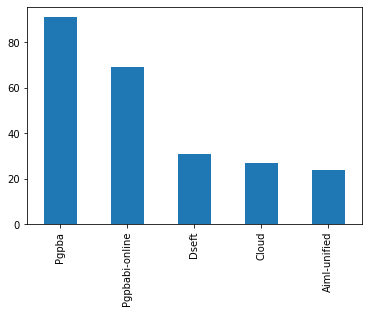

In [159]:
norm_counts = plot_top_n(df.loc[df['ProspectStage'] == 'Rejected', 'mx_Current_Interested_Program'])/intrsted_prog_counts

<AxesSubplot:>

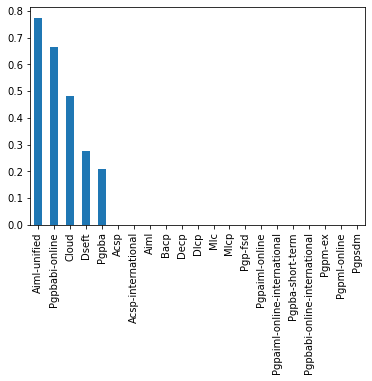

In [160]:
norm_counts.sort_values(ascending=False).plot(kind='bar')